In [1]:
import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('faces-spring-2020/faces-spring-2020'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
file_count = 0
for dirname, _, filenames in os.walk('faces-spring-2020/faces-spring-2020'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_count += 1

print(f"\nTotal files found: {file_count}")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

faces-spring-2020/faces-spring-2020\face-1.png
faces-spring-2020/faces-spring-2020\face-10.png
faces-spring-2020/faces-spring-2020\face-100.png
faces-spring-2020/faces-spring-2020\face-1000.png
faces-spring-2020/faces-spring-2020\face-1001.png
faces-spring-2020/faces-spring-2020\face-1002.png
faces-spring-2020/faces-spring-2020\face-1003.png
faces-spring-2020/faces-spring-2020\face-1004.png
faces-spring-2020/faces-spring-2020\face-1005.png
faces-spring-2020/faces-spring-2020\face-1006.png
faces-spring-2020/faces-spring-2020\face-1007.png
faces-spring-2020/faces-spring-2020\face-1008.png
faces-spring-2020/faces-spring-2020\face-1009.png
faces-spring-2020/faces-spring-2020\face-101.png
faces-spring-2020/faces-spring-2020\face-1010.png
faces-spring-2020/faces-spring-2020\face-1011.png
faces-spring-2020/faces-spring-2020\face-1012.png
faces-spring-2020/faces-spring-2020\face-1013.png
faces-spring-2020/faces-spring-2020\face-1014.png
faces-spring-2020/faces-spring-2020\face-1015.png
faces-s

In [8]:
import pandas as pd
#D:\6th SEMESTER\AI\faces-spring-2020\train.csv
train_df=pd.read_csv('faces-spring-2020/train.csv')
test_df=pd.read_csv('faces-spring-2020/test.csv')

print(train_df.head())
print(test_df.head())
print(train_df.describe())

   id       v1       v2       v3       v4       v5       v6       v7       v8  \
0   1  0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
1   2  0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
2   3  1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
3   4  1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
4   5 -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   

        v9  ...     v504     v505     v506     v507     v508     v509  \
0 -0.39341  ... -0.03494  1.32443 -0.94570  0.02055 -1.23908  0.43507   
1  0.69917  ...  0.86624 -1.24953 -0.21511 -1.54146  1.04765 -1.24035   
2  1.68940  ... -0.35893  0.02330  0.31548 -0.34923 -0.41772 -0.58175   
3 -0.15509  ...  0.23942  0.20774  0.81792 -0.74814 -0.62521  0.01689   
4  0.42009  ... -1.78407  0.07465  1.50182 -0.41289 -0.55908 -0.29702   

      v510     v511     v512  glasses  
0  1.08635  1.69027  0.61609      

In [13]:
import pandas as pd

# Load your Excel/CSV file
df = pd.read_excel('faces-spring-2020/Book1.xlsx')  # If you saved as Excel
# Or if CSV:
# df = pd.read_csv('/kaggle/input/your_csv_file.csv')

print(df.head())


          img  glasses
0  face-1.png        0
1  face-2.png        1
2  face-3.png        1
3  face-4.png        0
4  face-5.png        0


In [16]:
import cv2
import numpy as np
from tqdm import tqdm  # progress bar

image_folder = 'faces-spring-2020/faces-spring-2020/'
img_size = 64 

X = []
y = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = image_folder + row['img']
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize to 0-1
    X.append(img)
    y.append(row['glasses'])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape) 


100%|██████████| 4500/4500 [08:00<00:00,  9.36it/s]  


(4500, 64, 64, 3) (4500,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(3600, 64, 64, 3) (900, 64, 64, 3)


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


d:\6th SEMESTER\AI\faces-spring-2020\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,905 (796.50 KB)

 Trainable params: 203,905 (796.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_val, y_val))


Epoch 1/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 100s 539ms/step - accuracy: 0.6943 - loss: 0.5714 - val_accuracy: 0.8856 - val_loss: 0.2939
Epoch 2/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 58s 510ms/step - accuracy: 0.8723 - loss: 0.3211 - val_accuracy: 0.8800 - val_loss: 0.2965
Epoch 3/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 385ms/step - accuracy: 0.8696 - loss: 0.3223 - val_accuracy: 0.8878 - val_loss: 0.2720
Epoch 4/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step - accuracy: 0.8856 - loss: 0.2748 - val_accuracy: 0.8856 - val_loss: 0.2882
Epoch 5/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 300ms/step - accuracy: 0.8908 - loss: 0.2632 - val_accuracy: 0.8956 - val_loss: 0.2714
Epoch 6/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 70s 549ms/step - accuracy: 0.8949 - loss: 0.2604 - val_accuracy: 0.8989 - val_loss: 0.2584


In [22]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc}")
print(f"Validation loss: {val_loss}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8985 - loss: 0.2469
Validation Accuracy: 0.898888885974884
Validation loss: 0.2583981454372406


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
preds = model.predict(X_val)
preds = (preds > 0.5).astype(int).flatten()  # Convert probabilities to 0/1 and flatten to 1D


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


[[300  23]
 [ 68 509]]


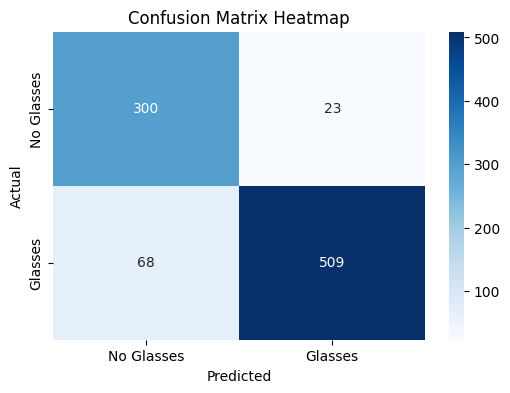

In [24]:
cm = confusion_matrix(y_val, preds)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [25]:
def predict_single_image(img_path, model, img_size=64):
    import cv2
    import numpy as np

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load {img_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size))

    # Normalize
    img = img / 255.0

    # Expand dimensions to make it (1, img_size, img_size, 3)
    img_input = np.expand_dims(img, axis=0)

    # Predict
    pred = model.predict(img_input)
    pred_class = int(pred[0][0] > 0.5)  # 0 or 1

    # Map to label
    label = "Glasses" if pred_class == 1 else "No Glasses"
    return label


In [27]:
import pandas as pd

# Load the test.csv
test_df = pd.read_csv('faces-spring-2020/test.csv')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Image ID: 4991 => Prediction: No Glasses


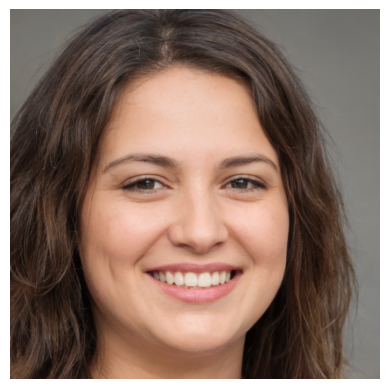

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Image ID: 4992 => Prediction: No Glasses


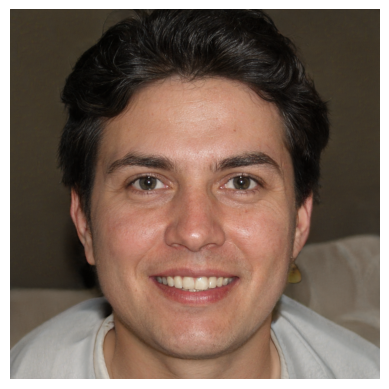

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Image ID: 4993 => Prediction: No Glasses


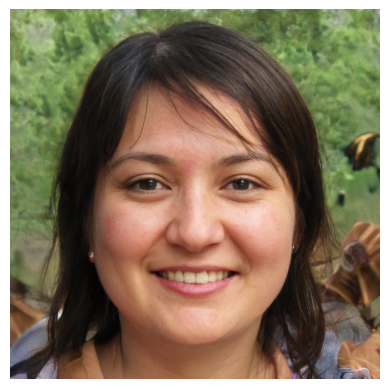

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Image ID: 4994 => Prediction: Glasses


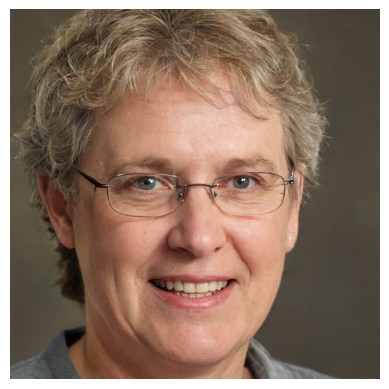

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Image ID: 4995 => Prediction: No Glasses


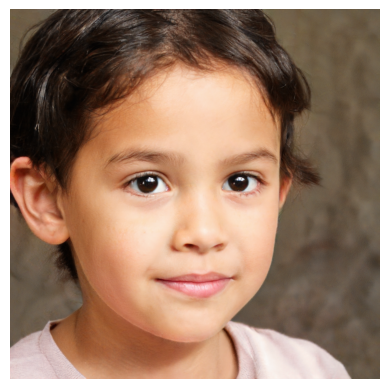

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Image ID: 4996 => Prediction: Glasses


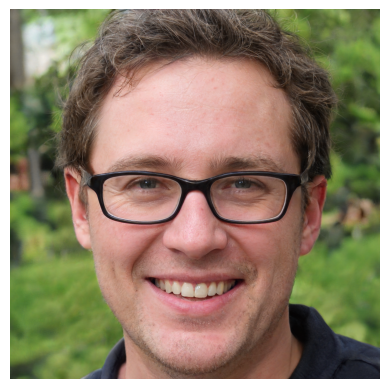

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
Image ID: 4997 => Prediction: Glasses


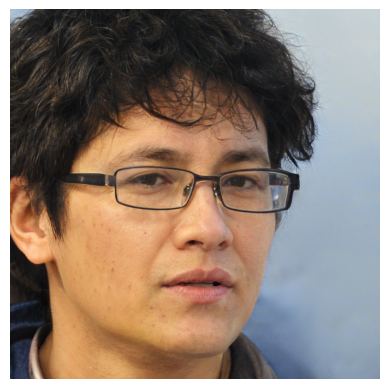

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Image ID: 4998 => Prediction: Glasses


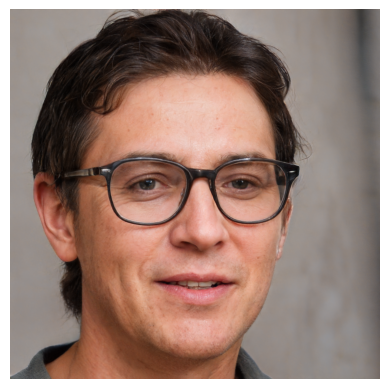

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Image ID: 4999 => Prediction: No Glasses


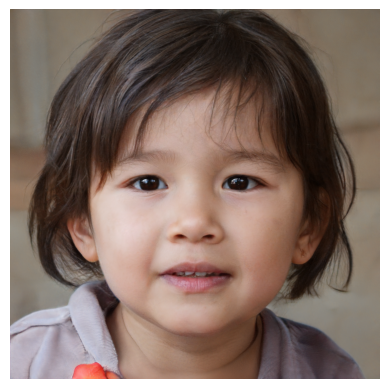

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Image ID: 5000 => Prediction: Glasses


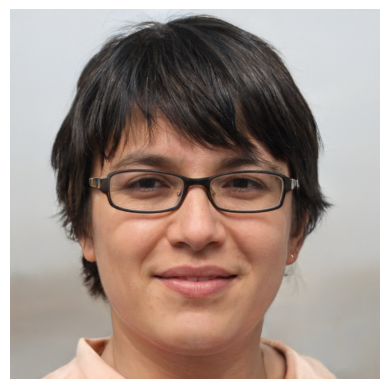

In [40]:
from PIL import Image 
for i in range(490, 500):
    img_id = test_df.loc[i, 'id']
    img_path = f'faces-spring-2020/faces-spring-2020/face-{img_id}.png'

    
    # Predict
    result = predict_single_image(img_path, model)
    print(f"Image ID: {img_id} => Prediction: {result}")
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


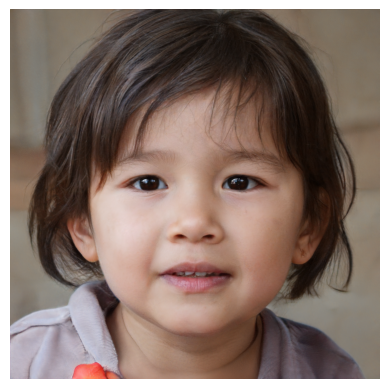

In [41]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = 'faces-spring-2020/faces-spring-2020/face-4999.png'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [42]:
model.save("glasses_model.h5")